In [44]:
#imports
import pandas as pd
from matplotlib import pyplot as plt

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
#from pingouin import pairwise_ttests #this is for performing the pairwise tests

%matplotlib inline

ModuleNotFoundError: No module named 'pingouin'

In [30]:
#set up dataframes 
commutes_2019 = pd.read_csv('./commute_data/2019commutetimes.csv', sep=',')

commutes_2020 = pd.read_csv('./commute_data/cleaned_results.csv', sep=',')

address_map = pd.read_csv('./commute_data/address_map.csv', sep='\t')

commutes_2020.head()



,origins,destinations,departure_times,travel_time,departure_dt,hour,date
0,"1500 E 92nd St, Brooklyn, NY 11236, USA","1740 Eastchester Rd, The Bronx, NY 10461, USA",1607947200,136,2020-12-14 07:00:00-05:00,7,2020-12-14
1,"1500 E 92nd St, Brooklyn, NY 11236, USA","4422 3rd Ave., The Bronx, NY 10456, USA",1607947200,131,2020-12-14 07:00:00-05:00,7,2020-12-14
2,"1500 E 92nd St, Brooklyn, NY 11236, USA","1447 St Nicholas Ave, New York, NY 10033, USA",1607947200,102,2020-12-14 07:00:00-05:00,7,2020-12-14
3,"1500 E 92nd St, Brooklyn, NY 11236, USA","25-10 30th Ave, Queens, NY 11102, USA",1607947200,98,2020-12-14 07:00:00-05:00,7,2020-12-14
4,"1500 E 92nd St, Brooklyn, NY 11236, USA","506 Lenox Ave, New York, NY 10037, USA",1607947200,84,2020-12-14 07:00:00-05:00,7,2020-12-14


In [53]:
#find avg per origin stop for 2019
avgs_2019 = commutes_2019.groupby('Depart').mean()
avg_commute_2019 = avgs_2019['Avg Time']
avg_commute_2019.head()

mean2019 = avg_commute_2019.describe().loc['mean']



In [55]:
# find avg per origin in 2020
avgs_2020 = commutes_2020.groupby('origins').mean()
#avgs_2020 = avgs_2020.set_index([pd.Index([1, 2, 3, 4,5])])
avg_commute_2020 = avgs_2020['travel_time']

avgs_2020.head()

mean2020 = avg_commute_2020.describe().loc['mean']


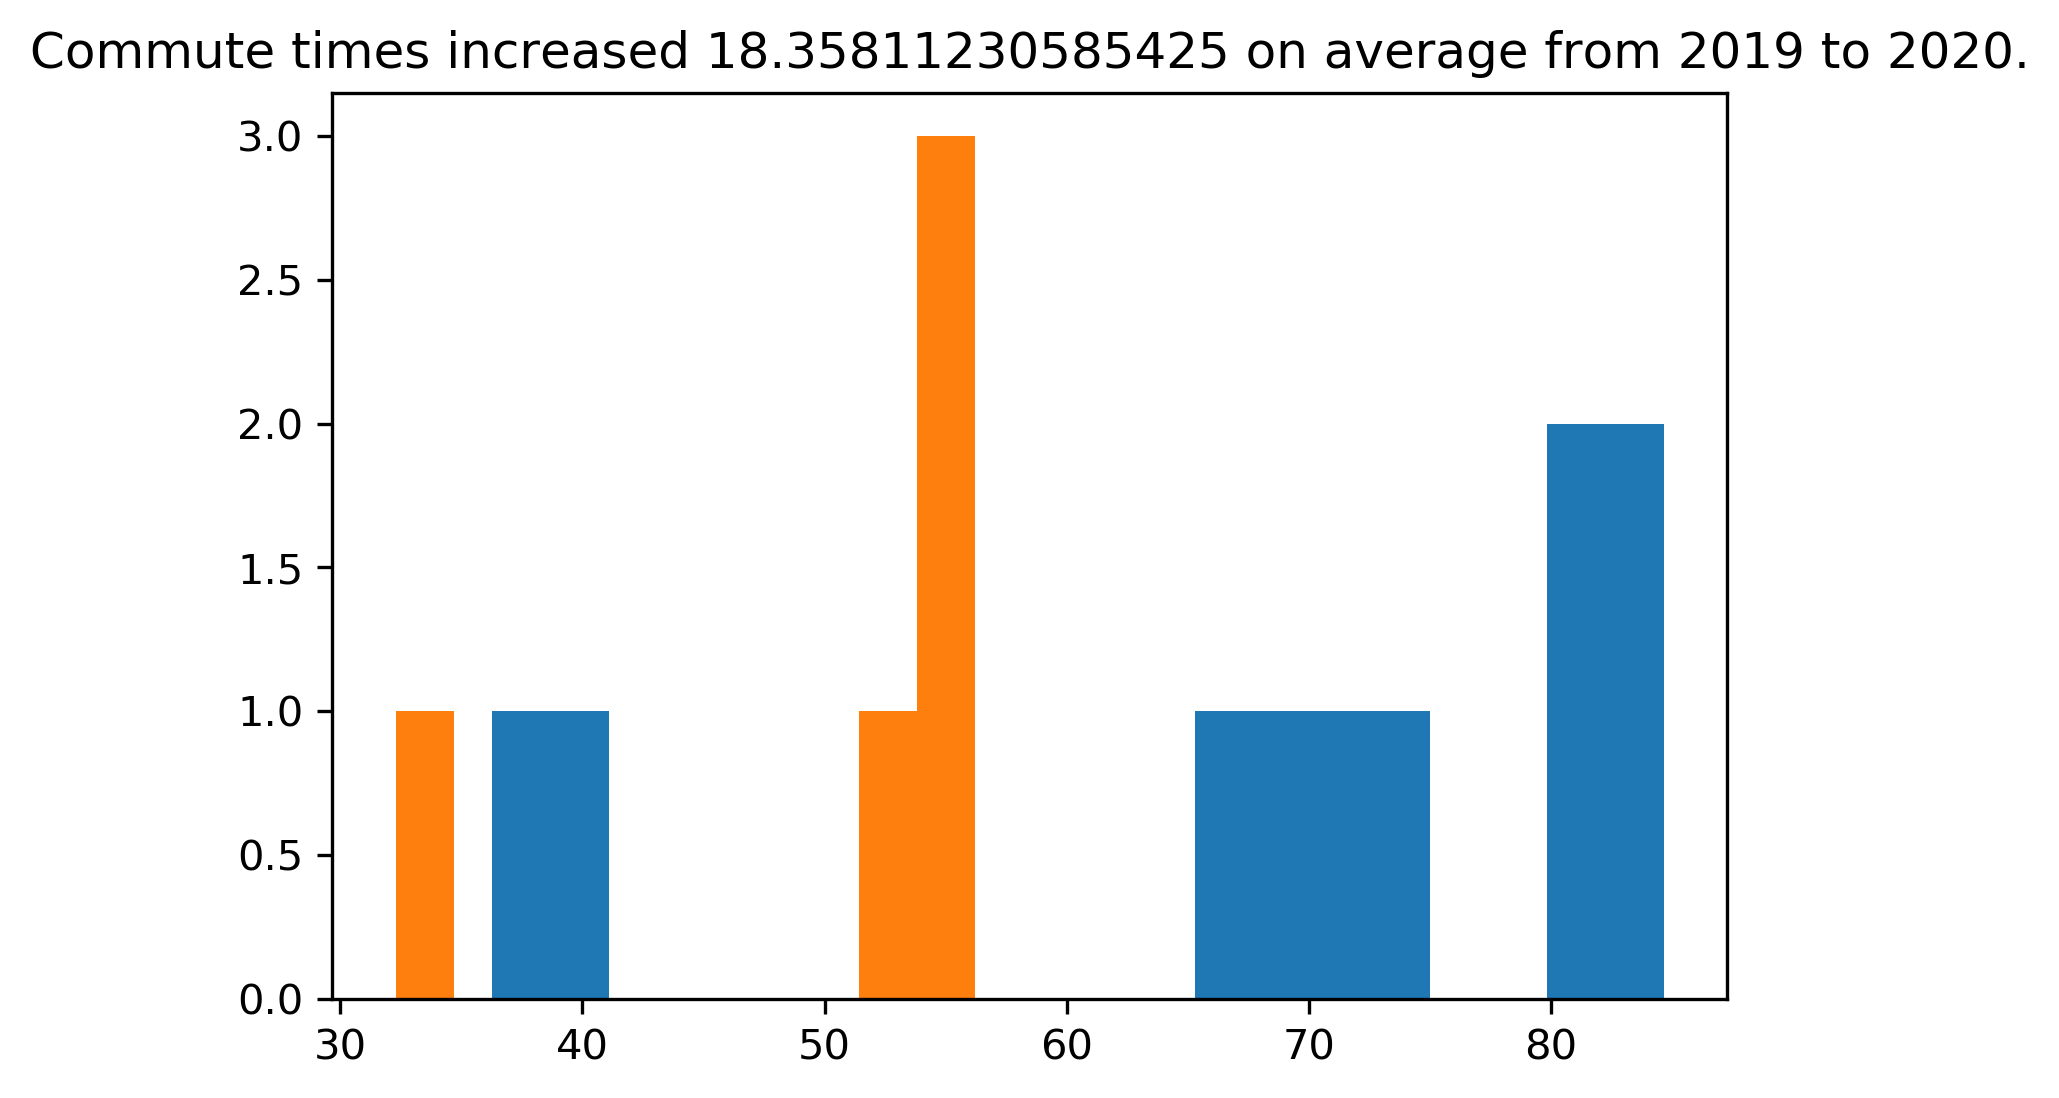

In [57]:
diff_means = mean2020 - mean2019

plt.hist(avg_commute_2020,bins = 10)
plt.hist(avg_commute_2019,bins = 10)
plt.title('Commute times increased ' + str(diff_means) + " on average from 2019 to 2020." )

In [62]:
# do hypothesis test to compare avg per 2019 vs 2020 on avg
T, pvalue = stats.ttest_1samp(avg_commute_2019, popmean=mean2020)
print(pvalue)  

# RESULT : pvla is .015, reject H0, the two samples for commute time are significantly different


0.01541803258009576


In [66]:
# do hypothesis test to compare avgs between neighborhoods in 2020
gb = commutes_2020.groupby('origins')
group_names = commutes_2020["origins"].unique()
print("\t\t\tstatistic\t\tpvalue")
for i in range(len(group_names)):
  for j in range(i+1, len(group_names)):
    group1 = gb[['travel_time']].get_group(group_names[i])
    group2 = gb[['travel_time']].get_group(group_names[j])
    stat, pvalue = stats.ttest_ind(group1, group2, equal_var = False)
    print(group_names[i] + " vs. " + group_names[j] + "\t" + str(stat[0]) + "\t" + str(pvalue[0]))

#RESULT - all the neighborhoods are statistically different?


			statistic		pvalue
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 108-35 167th St, Queens, NY 11433, USA	18.78037243203648	5.760483836148696e-77
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 102-29 215th St, Jamaica, NY 11429, USA	-9.928997156948846	4.222350436104529e-23
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	115.06455312916647	0.0
1500 E 92nd St, Brooklyn, NY 11236, USA vs. 2300 Randall Ave, The Bronx, NY 10473, USA	31.76451250480992	1.4041085320398283e-204
108-35 167th St, Queens, NY 11433, USA vs. 102-29 215th St, Jamaica, NY 11429, USA	-32.81095496380421	4.883336114389592e-222
108-35 167th St, Queens, NY 11433, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	117.0828530582406	0.0
108-35 167th St, Queens, NY 11433, USA vs. 2300 Randall Ave, The Bronx, NY 10473, USA	13.61753681134092	1.0491133089186269e-41
102-29 215th St, Jamaica, NY 11429, USA vs. 1290 St Nicholas Ave, New York, NY 10033, USA	143.69415067441813	0.0
102-29 215th 

In [ ]:
#TODO - pairwise tests between time increased per neighborhoods